# Draft analysis 

---

Group name: Group C, Burcin Aksel & Nico Henzel

---


## Introduction

The aim of this project is to investigate whether there is a correlation between the household income and the death rate in the United States of America. In order to explore this relation, we gathered data on both topics and will analyse how and to what extense the death rate is impacted by the household income.

### Research Question

We want to answer the following question:

**Does the household income have an impact on the deathrates in the U.S. and if yes, how big is it?**

The predictor variable will be the median household income and the response variable will be the age-adjusted death rate. Further insight can be gained by using categories like death cause, state or year. Other useful information will be provided by the amount of total deaths.
The data dictionary below is showing more details about the required variables.

In [8]:
import pandas as pd

data = {
        'Name': [
                'state',
                'year',
                'median_household_income',
                'cause name',
                '113 cause name',
                'deaths',
                'Age-adjusted Death Rate'
                ], 
        'Description': [
                'the state where data was collected',
                'considered years','median household income',
                'the generic name for the death cause',
                'NDI ICD-10 113 categories for causes of death',
                'count of the total deaths',
                'standardized death percentage for a state'
                ],
        'Role': [
                'predictor',
                'predictor',
                'predictor',
                'predictor',
                'Not used',
                'ID',
                'response'
                ],
        'Type': [
                'nominal',
                'numeric discrete',
                'numeric continuous',
                'nominal',
                'nominal',
                'numeric discrete',
                'numeric continuous'
                ],
        'Format': [
                'category',
                'date',
                'float',
                'category',
                'category',
                'int',
                'float'
                ],
        }

df = pd.DataFrame(data)

df

,Name,Description,Role,Type,Format
0,state,the state where data was collected,predictor,nominal,category
1,year,considered years,predictor,numeric discrete,date
2,median_household_income,median household income,predictor,numeric continuous,float
3,cause name,the generic name for the death cause,predictor,nominal,category
4,113 cause name,NDI ICD-10 113 categories for causes of death,Not used,nominal,category
5,deaths,count of the total deaths,ID,numeric discrete,int
6,Age-adjusted Death Rate,standardized death percentage for a state,response,numeric continuous,float


Our research question is backed by the following studies:
* KINGE, Jonas Minet, et al. Association of household income with life expectancy and cause-specific mortality in Norway, 2005-2015. Jama, 2019, 321. Jg., Nr. 19, S. 1916-1925. (https://jamanetwork.com/journals/jama/article-abstract/2733322)
* KAPLAN, George A., et al. Inequality in income and mortality in the United States: analysis of mortality and potential pathways. Bmj, 1996, 312. Jg., Nr. 7037, S. 999-1003. (https://www.bmj.com/content/312/7037/999.full)
* O’CONNOR, Gerald T., et al. Median household income and mortality rate in cystic fibrosis. Pediatrics, 2003, 111. Jg., Nr. 4, S. e333-e339. (https://publications.aap.org/pediatrics/article-abstract/111/4/e333/63113/Median-Household-Income-and-Mortality-Rate-in)

Although the first study was done in Norway and the second study investigates mortality instead of death rate, we suspect to gather similar observations.
Therefore our hypotheses regarding the research question is:

**The household income and the death rate will have a negative correlation.**

Meaning, that the higher the household income is, the lower the death rate will be.

Added information on mortality rate:
*Mortality is a fact that refers to susceptibility to death. While there is a crude death rate that refers to number of deaths in a population in a year, mortality rate is the number of deaths per thousand people over a period of time that is normally a year.* (see: https://www.differencebetween.com/difference-between-death-rate-and-vs-mortality-rate/)

## Setup

In [12]:
import pandas as pd
import numpy as np
import sklearn 
import missingno as mno # needed to visualize missing values. install missingno into conda if import does not work!
import altair as alt
import matplotlib.pyplot as plt
import xlrd # needed to read excel files. install xlrd into conda if import does not work!
import shutil # needed to copy files
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

## Data

## Import data

In [13]:
# Declare variables
external_data = '..\\data\\external\\'
raw_data = '..\\data\\raw\\'

# File names
orig_income_file = 'Median_Household_Income_By_State_1990-2017.xls'
target_income_file = 'Median_Household_Income_By_State_1990-2017.csv'
orig_death_file = 'NCHS_-_Leading_Causes_of_Death__United_States.csv'


In [14]:
# Save external median income data as csv in folder 'raw'
# Read file
xls_household_file = pd.read_excel(external_data+orig_income_file)
# Save file
xls_household_file.to_csv(raw_data+target_income_file,index = None, header=True)
# Copy external leading cause of death data into folder 'raw'
shutil.copy(external_data+orig_death_file, raw_data+orig_death_file)


'..\\data\\raw\\NCHS_-_Leading_Causes_of_Death__United_States.csv'

In [15]:
# Declare both dataframes
df_income = pd.read_csv(raw_data+target_income_file)
df_death = pd.read_csv(raw_data+orig_death_file)

### Data structure

In [16]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 32 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Table 102.30. Median household income, by state: Selected years, 1990 through 2017  59 non-null     object 
 1   Unnamed: 1                                                                          54 non-null     object 
 2   Unnamed: 2                                                                          54 non-null     object 
 3   Unnamed: 3                                                                          54 non-null     float64
 4   Unnamed: 4                                                                          52 non-null     float64
 5   Unnamed: 5                                                                          54 non-null     f

In [ ]:
df_income

,"Table 102.30. Median household income, by state: Selected years, 1990 through 2017",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,[In constant 2017 dollars. Standard errors app...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,State,1990\1\,2000\2\,2005.0,NaN,2010.0,NaN,2013.0,NaN,2014.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2,3,4.0,NaN,5.0,NaN,6.0,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
3,United States ...........,57500,62000,58200.0,80.0,56400.0,40.0,55100.0,40.0,55600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama ....................,45200,50400,46400.0,400.0,45600.0,320.0,45200.0,410.0,44400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Wyoming ..................,51900,55900,58100.0,1160.0,60300.0,1300.0,61900.0,1150.0,59100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,\1\Based on 1989 incomes collected in the 1990...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,\2\Based on 1999 incomes collected in the 2000...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NOTE: Constant dollars adjusted by the Consume...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     10868 non-null  int64  
 1   113 Cause Name           10868 non-null  object 
 2   Cause Name               10868 non-null  object 
 3   State                    10868 non-null  object 
 4   Deaths                   10868 non-null  int64  
 5   Age-adjusted Death Rate  10868 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 509.6+ KB


In [ ]:
df_death

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8
...,...,...,...,...,...,...
10863,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Virginia,1035,16.9
10864,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Washington,278,5.2
10865,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,West Virginia,345,16.4
10866,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Wisconsin,677,11.9


In the death dataset we have 10868 cases and 6 columns.

The columns are:
* years, from 1999 to 2017
* 113 cause name, the NDI ICD-10 113 categories for causes of death
* cause name, the generic name for the death cause defined in the 113 cause name column
* state, in which state the data was collected
* death, the count of the total deaths 
* age-adjusted death rate, the standardized death percentage for the specific state in the observed year.


The following steps are:

* The income dataset needs to be cleaned and corrected in order to be joined with the death dataset (see data-corrections)
* The columns for the income dataset need to be transformed in order to have the same format as the death dataset.
* The join can be done by state, the missing income values for the years not represented in the income dataset need to either be dropped or replaced


### Data corrections

#### Income Dataset

In [ ]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 32 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Table 102.30. Median household income, by state: Selected years, 1990 through 2017  59 non-null     object 
 1   Unnamed: 1                                                                          54 non-null     object 
 2   Unnamed: 2                                                                          54 non-null     object 
 3   Unnamed: 3                                                                          54 non-null     float64
 4   Unnamed: 4                                                                          52 non-null     float64
 5   Unnamed: 5                                                                          54 non-null     f

We will perform different corrections for this dataset. The steps are explained as comments within the code:

In [18]:
# We only need the first 16 columns 
# and we can also drop the columns 4,6,8,10,12 and 14 since they only show NaN values
column_lst = [0,1,2,3,5,7,9,11,13,15]
df_income_corrected = df_income[df_income.columns[column_lst]]
# We don't need row 0,2 and row 64-67
row_drop_lst = [0,2,64,65,66,67]
df_income_corrected = df_income_corrected.drop(row_drop_lst)
# There are a few rows with empty entries left, which we can get rid off 
# since those rows have no state assigned to it, they are only used as separators
df_income_corrected.dropna(inplace=True)
# The column names are actually in the first row, additionally they need to be adjusted
column_names = ['State','1990','2000','2005','2010','2013','2014','2015','2016','2017']
df_income_corrected.columns = column_names
# Row number 1 can be dropped
df_income_corrected.drop(1,inplace=True)
# The dots in the state column can be removed
# We also do not want any leading or ending spaces in the strings
df_income_corrected = df_income_corrected.replace(r'\.','',regex=True)
df_income_corrected['State'] = df_income_corrected['State'].str.strip()
# Lastly we reset the row index drop the old index 
df_income_corrected.reset_index(drop = True, inplace = True)


We also need to make some data transformations in order for this dataset to be joined later on.

In [19]:
# We transform the table to show the median income for a state in a single year
# We use the melt() function for this
lst_years = column_names[1:]
df_income_corrected = df_income_corrected.melt(
    id_vars= ['State'], 
    value_vars= lst_years, 
    var_name= 'year', 
    value_name= 'median_household_income' 
    )

# The State column should be lowercase
df_income_corrected = df_income_corrected.rename(
    columns = {'State':'state'}
)
# The types need to be declared, state holds categorial values, year has integers and income holds float numbers
df_income_corrected['state'] = df_income_corrected['state'].astype('category')
df_income_corrected['year'] = df_income_corrected['year'].astype('int')
df_income_corrected['median_household_income'] = df_income_corrected['median_household_income'].astype('float')

In [20]:
df_income_corrected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   state                    468 non-null    category
 1   year                     468 non-null    int32   
 2   median_household_income  468 non-null    float64 
dtypes: category(1), float64(1), int32(1)
memory usage: 8.5 KB


In [ ]:
df_income_corrected

,state,year,median_household_income
0,United States,1990,57500.0
1,Alabama,1990,45200.0
2,Alaska,1990,79300.0
3,Arizona,1990,52700.0
4,Arkansas,1990,40500.0
...,...,...,...
463,Virginia,2017,71500.0
464,Washington,2017,71000.0
465,West Virginia,2017,43500.0
466,Wisconsin,2017,59300.0


In [21]:
file = 'Corrected_Median_Household_Income_By_State_1990-2017.csv'
df_income_corrected.to_csv(raw_data+file,index = None, header=True)

We prepared the income data set in order to use it for our project. 
The original .xls data can be found in the data folder under external or the .csv under raw 

In the final death data set we have 468 cases and 3 columns.

The columns are:
* state, in which the data was collected
* years, 1990, 2000, 2005, 2010 and 2013-2017
* median_household_income

#### Death Dataset

In [22]:
df_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     10868 non-null  int64  
 1   113 Cause Name           10868 non-null  object 
 2   Cause Name               10868 non-null  object 
 3   State                    10868 non-null  object 
 4   Deaths                   10868 non-null  int64  
 5   Age-adjusted Death Rate  10868 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 509.6+ KB


* The Dtypes 113 Cause Name, Cause Name and State need to be changed to category.
* The year, deaths and death rate column already have the right typing.
* The column names will be adjusted to be lowercase and have underscores instead of spaces.
* Also, there are no missing values present in the dataset.

In [23]:
df_death_corrected = df_death

In [24]:
# Change column names to lowercase
df_death_corrected.columns = df_death_corrected.columns.str.lower()
# Change spaces and the '-' to underscores
df_death_corrected.columns = df_death_corrected.columns.str.replace(r' ','_',regex=True)
df_death_corrected.columns = df_death_corrected.columns.str.replace(r'-','_',regex=True)
# Remove any leading or trailing whitespaces for the object columns
df_death_corrected['113_cause_name'] = df_death_corrected['113_cause_name'].str.strip()
df_death_corrected['cause_name'] = df_death_corrected['cause_name'].str.strip()
df_death_corrected['state'] = df_death_corrected['state'].str.strip()
# Change Dtype of 113 Cause Name, Cause Name and State column to category
cols = df_death_corrected.select_dtypes(include='object').columns.to_list()
df_death_corrected[cols] = df_death_corrected[cols].astype('category')

In [25]:
df_death_corrected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   year                     10868 non-null  int64   
 1   113_cause_name           10868 non-null  category
 2   cause_name               10868 non-null  category
 3   state                    10868 non-null  category
 4   deaths                   10868 non-null  int64   
 5   age_adjusted_death_rate  10868 non-null  float64 
dtypes: category(3), float64(1), int64(2)
memory usage: 289.9 KB


In [28]:
df_joined = pd.merge(
    df_death_corrected,
    df_income_corrected,
    how = 'left',
    on = ['year','state']
)


## KÖNNTE AUCH AB HIER IN DATA ANALYSIS
Da Daten untersucht werden müssen, um die Inhalte zu ersetzen, können wir das auch in den nächsten Abschnitt packen.


In [29]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10868 entries, 0 to 10867
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   year                     10868 non-null  int64   
 1   113_cause_name           10868 non-null  category
 2   cause_name               10868 non-null  category
 3   state                    10868 non-null  category
 4   deaths                   10868 non-null  int64   
 5   age_adjusted_death_rate  10868 non-null  float64 
 6   median_household_income  4576 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 459.6 KB


<AxesSubplot: >

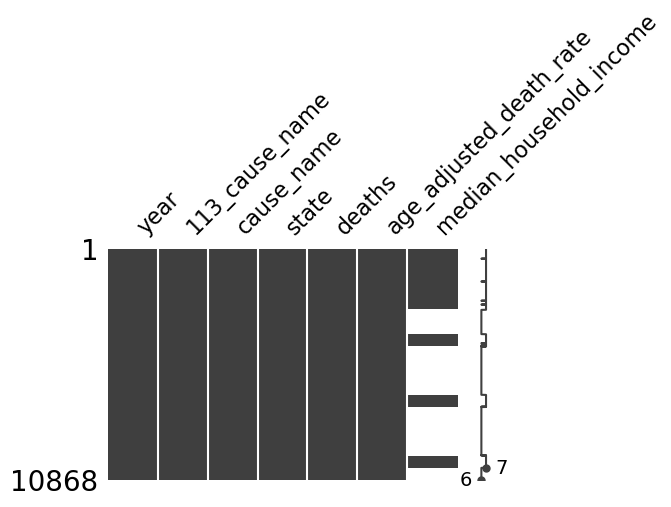

In [ ]:
mno.matrix(df_joined, figsize = (5, 3))

In [ ]:
# Show the percentage of missing values for each column
df_joined.isnull().mean() * 100

year                        0.000000
113_cause_name              0.000000
cause_name                  0.000000
state                       0.000000
deaths                      0.000000
age_adjusted_death_rate     0.000000
median_household_income    57.894737
dtype: float64

After joining, the median_household_income is an additional column for the death data set.

We only have the median household income for the year 1990, 2000, 2005, 2010 and 2013-2017.
In the death dataset we find the years starting from 1999 until 2017.
That is the reason why we only have 4576 non-null values for the median household income. 
This means that roughly 58 % of the column has empty values which we need to either fill (by imputing) or remove.

Since removing would lead to our dataset to be cut by over half, that is not a viable option.
Therefore we will impute the missing values.

In order to do so, we will take a look at the distribution and the summary statistics for the present data in median household income:

In [30]:
# Dataframe with only median household income as column
df_household_income = df_joined[['median_household_income']]

# Summary statistics
df_household_income.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
median_household_income,4576.0,58179.33,9580.27,40000.0,51050.0,56350.0,64000.0,82400.0


<AxesSubplot:title={'center':'Distribution of median household income before imputation'}, ylabel='Density'>

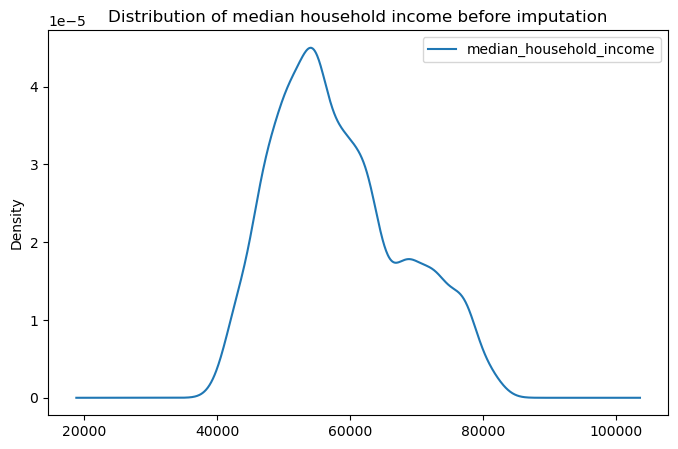

In [31]:
# Distribution of median household income
df_household_income.plot(kind='kde', figsize=(8, 5), title='Distribution of median household income before imputation')

In [32]:
# Scatteplot income over years
alt.Chart(df_joined).mark_circle(size=60).encode(
    x=alt.X('year', 
            title='Year',
            scale=alt.Scale(domain = (1999,2018))
            ),
    y=alt.Y('median_household_income', 
            title='Median Household Income ($)',
            scale=alt.Scale(zero=False)
            ),
    tooltip=['year', 'median_household_income']
).interactive()

alt.Chart(...)

## Hier weiter: TEST WELCHE ERSETZUNG AM BESTEN FUNKTIONIERT

* Regression imputation ansetzen:
https://www.theanalysisfactor.com/seven-ways-to-make-up-data-common-methods-to-imputing-missing-data/
    - Könnte gut funktionieren, da das Einkommen mit den Jahren korreliert und wächst bzw sinkt
* Scatterplot (siehe oben) mit Kategorien für State darstellen
* Inhalte in Data Analysis abschnitt übertragen

We will now impute the missing values by using a KNN Imputation since that will typically result in a good imputation for numerical values.

We have already seen that the distribution is right-skewed, which might impact the algorithm, since there are some outliers present. We will compare the distributions after we made the imputation and evaluate the result.

The data should be scaled in order for the algorithm to perform well.

In [34]:
from sklearn.preprocessing import MinMaxScaler

# Original household median income 
original_df_household_income = df_household_income.copy()

# Scaled household median income
scaler = MinMaxScaler()
scaled_df_household_income = scaler.fit_transform(original_df_household_income)
scaled_df_household_income = pd.DataFrame(data=scaled_df_household_income, columns=original_df_household_income.columns)
scaled_df_household_income.head()

,median_household_income
0,0.478774
1,0.191038
2,0.783019
3,0.391509
4,0.139151


After the imputation, we’ll have to use the inverse_transform() function from MinMaxScaler to bring the scaled dataset in the original form:

In [35]:
from sklearn.impute import KNNImputer

# Impute
imputer_scaled = KNNImputer(n_neighbors=5)
imputed_scaled = imputer_scaled.fit_transform(scaled_df_household_income)

# Convert to DataFrames
imputed_scaled = pd.DataFrame(data=imputed_scaled, columns=original_df_household_income.columns)

# Inverse the scaling
imputed_scaled = scaler.inverse_transform(imputed_scaled)
imputed_scaled = pd.DataFrame(data=imputed_scaled, columns=original_df_household_income.columns)

In [36]:
# compare the original and imputed median income column
example = df_household_income
example['income_KNN_Scaled'] = imputed_scaled

# Obtain summary statistics
example.describe().T[['mean', 'std', 'min', '50%', 'max']]

C:\Users\buaksel\AppData\Local\Temp\ipykernel_25460\2307588546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example['income_KNN_Scaled'] = imputed_scaled


,mean,std,min,50%,max
median_household_income,58179.326923,9580.271444,40000.0,56350.000000,82400.0
income_KNN_Scaled,58179.326923,6216.107695,40000.0,58179.326923,82400.0


<AxesSubplot: title={'center': 'Distribution of median household income after imputation'}, ylabel='Density'>

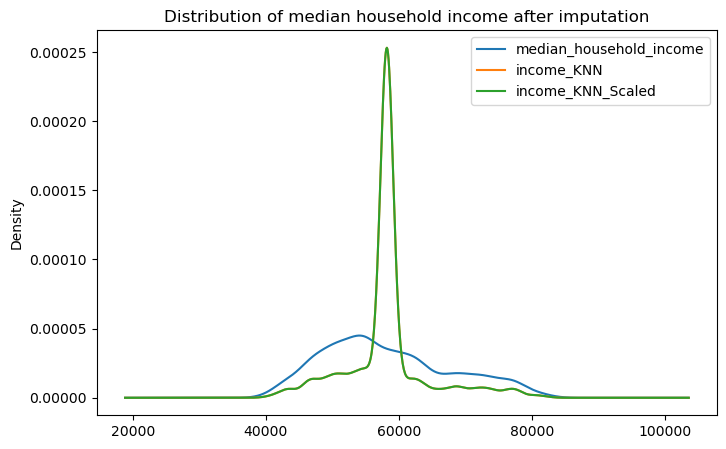

In [ ]:
# Distribution of median household income
example.plot(kind='kde', figsize=(8, 5), title='Distribution of median household income after imputation')

# Anmerkung: Sieht kacke aus ist wahrscheinlich keine gute methode in unserem fall

This will leave us with 6 columns in total, which we can use for our data analysis (we will later disregard the 113 Cause name column since we will see, that the same information is provided by the cause name column)

### Variable lists
## Burcin

In [39]:
# list of all numerical data
list_num = df_joined.select_dtypes(include=[np.number]).columns.tolist()

# list of all categorical data
list_cat = df_joined.select_dtypes(include=['category']).columns.tolist()


In [40]:
df_joined.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10868 entries, 0 to 10867
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   year                     10868 non-null  int64   
 1   113_cause_name           10868 non-null  category
 2   cause_name               10868 non-null  category
 3   state                    10868 non-null  category
 4   deaths                   10868 non-null  int64   
 5   age_adjusted_death_rate  10868 non-null  float64 
 6   median_household_income  4576 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 459.6 KB


In [41]:

# define outcome variable as y_label
y_label = 'age_adjusted_death_rate'

# select features
features = df_joined.drop(columns=[y_label]).columns.tolist()

# create feature data for data splitting
X = df_joined[features]

# list of numeric features
feat_num = X.select_dtypes(include=[np.number]).columns.tolist()

# list of categorical features
feat_cat = X.select_dtypes(include=['category']).columns.tolist() 

# create response for data splitting
y = df_joined[y_label]


### Data splitting

## Burcin

In [42]:
# scikit-learn’s train test split function
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
# data exploration set
df_train = pd.DataFrame(X_train.copy())
df_train = df_train.join(pd.DataFrame(y_train))

## Analysis

## Nico - OFFEN

Analysis Approach umsetzen

Idee:
Imputation der Einkommensdaten als Ansatz zur Analyse der Inhalte nehmen (statistische Auswertung der Verteilung, Auswirkung auf Modell der unterschiedlichen Ersetzungsmöglkichkeiten)

Vorgehen:
* Inhalte von oben runterkopieren
* Ersetzung durch KNN / Regression durchführen
* Auswertung der Ersetzung in Form von Summary Statistics und Verteilungen darstellen
* Besten Ersatz auswählen
* Analyse zu anderen Spalten noch offen
* Korrelation abbilden, Verhältnisse darstellen




Our response variable is the age-adjusted death rate.
This variable shows the standardized percentage of deaths in a specific year for a specific state (adjusted for the age factor). 

In order to test our hypotheses we will use different visualizations and summary statistics. 

For example:
* Multi-Line Highlight or Multi-Line Tooltip, because x axis (income) as well as y axis (death rate) are numeric variables and the categories for death cause could be vizualized with different lines. 
    Examples can be found here: 
    * https://altair-viz.github.io/gallery/multiline_tooltip.html
    * https://altair-viz.github.io/gallery/multiline_highlight.html

    Additionally, we will show different line plots with summarized info on the income per state or per year and also the death rate per state or per year.
* For the overall death rates and income for different years a wrapped facet plot will be used to gain insights for comparison.
    * https://altair-viz.github.io/gallery/beckers_barley_wrapped_facet.html

* In addition, summary statistics in table form will show the changes over the years for
    -  Total death cause or death rate in the US by year
    - Death Casue or death rate by state for each year
 
The predictor variable will be the median household income. Although we suspect the death cause, year and the state to be indicators for variation on a more detailed level. This can give us insights and potential relevant information for our model during the data exploration.

### Descriptive statistics

### Exploratory data analysis

## Darstellungsideen:

* Darstellung aus Einleitung übernehmen:
    - Verhältnis Einkommen zu Deathrate visualisieren
        - x-Achse: Income
        - y-Achse: Deathrate
        - Kategorien: state
        - Plot art: Linie

* Verlauf von Deathrate pro State über die Jahre
    - x-Achse: Year
    - y-Achse: Deathrate
    - Kategorien: state
    - Plot art: Scatter
* Verlauf von Einkommen pro State über die Jahre
    - x-Achse: Year
    - y-Achse: Income
    - Kategorien: state
    - Plot art: Scatter
* Verteilung Einkommen pro Region in unterschiedlichen Jahren
    - Neue Variable: region (aus Geografischer Verteilung der States bauen)
    - x-Achse: Year
    - y-Achse: Deathrate
    - Kategorien: region
    - Plot art: Ridge, faceted
* Anzahl Gesamttode pro Todesart darstellen
    - x-Achse: Todesart
    - y-Achse: Tode
    - (Kategorien: state vielleicht zu Granular?)
    - Plot art: Bar Plot
* Einkommensdurchschnitt über alle Jahre für alle Staaten
    - x-Achse: region (neu berechnen, siehe oben)
    - y-Achse: Mean income (neu berechnen)
    - Plot art: Bar Plot
* Wie oft kommen welche Einkommensbereiche vor
    - x-Achse: Einkommensbereich (neu berechnen)
    - y-Achse: Count
    - Plot art: Histogramm
    - Einfärbung, in welchem Staat der Bereich am ehesten vorkommt?
* Wie oft kommen Bereiche von Todesraten vor
    - x-Achse: Bereich Todesrate (neu berechnen)
    - y-Achse: Count
    - Plot art: Histogramm
    - Einfärbung, in welchem Staat der Bereich am ehesten vorkommt?

* Top 5 und Bottom 5
    - States mit höchstem median income und states mit niedrigstem
        - x-Achse: Year
        - y-Achse: Deathrate
        - Kategorien: 5 states mit höchstem / niedrigstem (filtern notwendig)
        - Plot art: Linie




### Relationships

## Model

## Nico
### Kopieren aus Notebook 44 und Modeltypen passend zu proposal umsetzen

Abstimmung, welche Metriken und Erkenntnisse aus den Modellen für uns relevant sind

### Model type
Since the predictor and the response variable are numeric, and we try to find a patter between them, we have a regression problem.
We will start with simple linear regression since we suspect to only have one predictor (household income) and one response/dependent (death rate) variable and will assume a linear relationship. 

This assumption could change, depending on the insights we get from our analysis of the data. Therefore we will also take the following models into account:
* Polynomial Regression, in case the relationship between predictor and response variable is not linear
* Bayesian Regression
* Decision Tree Regression, mainly xgboost
* Gradient Descent Regression

In order to find the best performing model, we will compare them using a specific metric (e.g. Mean Squared Error or Mean Absolute Error)

### Select model

### Training and validation

### Fit model

### Evaluation on test set

### Save model



Save your model in the folder `models/`. Use a meaningful name and a timestamp.

## Conclusions

Am Ende die weiteren Schritte und bisherigen Interprationen auflisten.